In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
# Set the path to your dataset
dataset_path = "/kaggle/input/aid-scene-classification-datasets/AID/"

# Get the class labels
class_labels = os.listdir(dataset_path)

# Initialize empty lists to store images and labels
data = []
labels = []

# Loop through each class label
for label in class_labels:
    class_path = os.path.join(dataset_path, label)

    # Loop through each image in the class folder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Read and preprocess the image
        img = load_img(img_path, target_size=(128, 128))  # You can adjust the target size
        img = img_to_array(img)
        #img = img / 255.0  # Normalize pixel values to be between 0 and 1

        # Append the image and its corresponding label to the lists
        data.append(img)
        labels.append(class_labels.index(label))  # Convert class label to numerical index

# Convert the data and labels lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
print(labels)

[ 0  0  0 ... 29 29 29]


In [ ]:
# Print the count of samples in each class
for label in class_labels:
    count = labels.tolist().count(class_labels.index(label))
    print(f"Class {label}: {count} samples")


Class Mountain: 340 samples
Class Airport: 360 samples
Class Park: 350 samples
Class River: 410 samples
Class DenseResidential: 410 samples
Class StorageTanks: 360 samples
Class Church: 240 samples
Class BaseballField: 220 samples
Class Parking: 390 samples
Class Square: 330 samples
Class Industrial: 390 samples
Class RailwayStation: 260 samples
Class SparseResidential: 300 samples
Class MediumResidential: 290 samples
Class Viaduct: 420 samples
Class Pond: 420 samples
Class Center: 260 samples
Class Port: 380 samples
Class BareLand: 310 samples
Class Bridge: 360 samples
Class Resort: 290 samples
Class Beach: 400 samples
Class Meadow: 280 samples
Class Farmland: 370 samples
Class Desert: 300 samples
Class Stadium: 290 samples
Class Forest: 250 samples
Class Commercial: 350 samples
Class School: 300 samples
Class Playground: 370 samples


In [ ]:
# Plot the updated distribution of samples in each class after taking 200 images
plt.bar(class_labels, [labels.tolist().count(class_labels.index(label)) for label in class_labels])
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples in Each Class (After Reading 200 images each)')
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()


NameError: name 'plt' is not defined

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Set the path to your dataset
dataset_path = "/kaggle/input/aid-scene-classification-datasets/AID/"

# Get the class labels
class_labels = os.listdir(dataset_path)

# Initialize empty lists to store images and labels
data = []
labels = []

# Take 200 images from each class
num_images_per_class = 200

# Loop through each class label
for label in class_labels:
    class_path = os.path.join(dataset_path, label)

    # Loop through each image in the class folder
    count = 0
    for img_name in os.listdir(class_path):
        if count >= num_images_per_class:
            break

        img_path = os.path.join(class_path, img_name)

        # Read and preprocess the image
        img = load_img(img_path, target_size=(128, 128))  # You can adjust the target size
        img = img_to_array(img)
        img = img / 255.0  # Normalize pixel values to be between 0 and 1

        # Append the image and its corresponding label to the lists
        data.append(img)
        labels.append(class_labels.index(label))  # Convert class label to numerical index

        count += 1

# Convert the data and labels lists to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Verify the shape of the combined data and labels
print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

Shape of data: (6000, 128, 128, 3)
Shape of labels: (6000,)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True,stratify=labels)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4800, 128, 128, 3) (1200, 128, 128, 3) (4800,) (1200,)


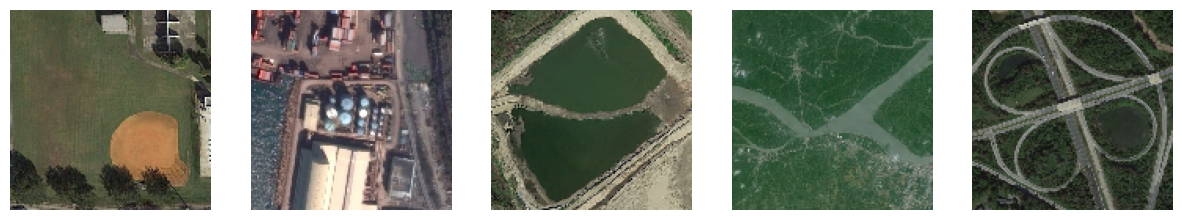

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to display a random sample of images with their labels
def display_samples(images, labels, class_labels, num_samples=5):
    plt.figure(figsize=(15, 7))
    for i in range(num_samples):
        index = random.randint(0, len(images) - 1)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[index])
        plt.axis('off')
    plt.show()


display_samples(X_train, y_train, class_labels)

In [ ]:
!pip install --upgrade scipy scikit-image


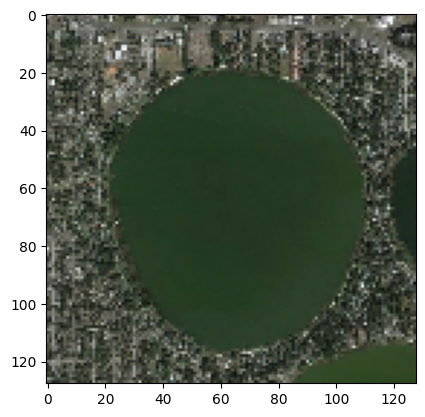

In [ ]:
plt.imshow(X_test[0],cmap='gray')

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load MobileNetV2 pre-trained on ImageNet, excluding the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Extract features using the pre-trained model
X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

# Add Global Average Pooling layer to reduce the number of parameters
X_train_features = GlobalAveragePooling2D()(X_train_features)
X_test_features = GlobalAveragePooling2D()(X_test_features)


38/38 [==============================] - 2s 24ms/step


In [ ]:
from tensorflow.keras import layers, models

from tensorflow.keras.layers import BatchNormalization

# Modify the model to include Batch Normalization
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(30, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
150/150 [==============================] - 13s 53ms/step - loss: 2.9018 - accuracy: 0.2221 - val_loss: 4.5796 - val_accuracy: 0.0358
Epoch 2/100
150/150 [==============================] - 7s 47ms/step - loss: 2.0616 - accuracy: 0.3885 - val_loss: 5.6419 - val_accuracy: 0.0608
Epoch 3/100
150/150 [==============================] - 7s 47ms/step - loss: 1.7134 - accuracy: 0.4858 - val_loss: 2.9524 - val_accuracy: 0.1758
Epoch 4/100
150/150 [==============================] - 7s 47ms/step - loss: 1.4018 - accuracy: 0.5713 - val_loss: 1.5896 - val_accuracy: 0.4775
Epoch 5/100
150/150 [==============================] - 7s 47ms/step - loss: 1.1860 - accuracy: 0.6394 - val_loss: 2.6549 - val_accuracy: 0.3250
Epoch 6/100
150/150 [==============================] - 7s 47ms/step - loss: 1.0062 - accuracy: 0.6881 - val_loss: 2.9691 - val_accuracy: 0.2725
Epoch 7/100
150/150 [==============================] - 7s 47ms/step - loss: 0.8083 - accuracy: 0.7544 - val_loss: 2.2984 - val_accuracy

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization_6 (Bat  (None, 126, 126, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 batch_normalization_7 (Bat  (None, 61, 61, 128)       512       
 chNormalization)                                                
                                                      

38/38 [==============================] - 1s 12ms/step
Accuracy: 0.585
Precision: 0.61149398864502
Recall: 0.585
F1-score: 0.5729292587510119
Confusion Matrix:
 [[19  1  0  0  0  0  0  0  0  0  3  2  0  0  3  0  0  0  0  0  5  0  0  0
   1  0  5  1  0  0]
 [ 0 16  0  0  0  2  0  0  1  1  5  5  0  0  2  0  1  0  2  1  0  3  0  0
   1  0  0  0  0  0]
 [ 1  1 16  0  0  0  2  0  0  2  1  2  0  1  0  0  0  3  0  4  1  0  0  0
   0  0  1  3  2  0]
 [ 6  2  1 11  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0  4  2  3  0  1
   0  3  3  0  0  1]
 [ 0  0  1  0 10  0  4  0  0  0  8  2  1  3  1  0  2  0  0  0  1  0  0  0
   0  0  1  3  3  0]
 [ 0  2  0  1  0 11  7  0  3  0  5  0  0  0  0  0  4  1  0  0  4  1  0  0
   0  0  0  0  1  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  1  0  3  0  0  0  1  0  0  0
   0  0  0  1  1  0]
 [ 0  1  0  1  0  0  0 29  0  0  0  0  0  0  0  1  1  0  1  0  2  0  0  1
   1  0  0  0  1  1]
 [ 0  1  0  0  0  0  0  0 37  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  

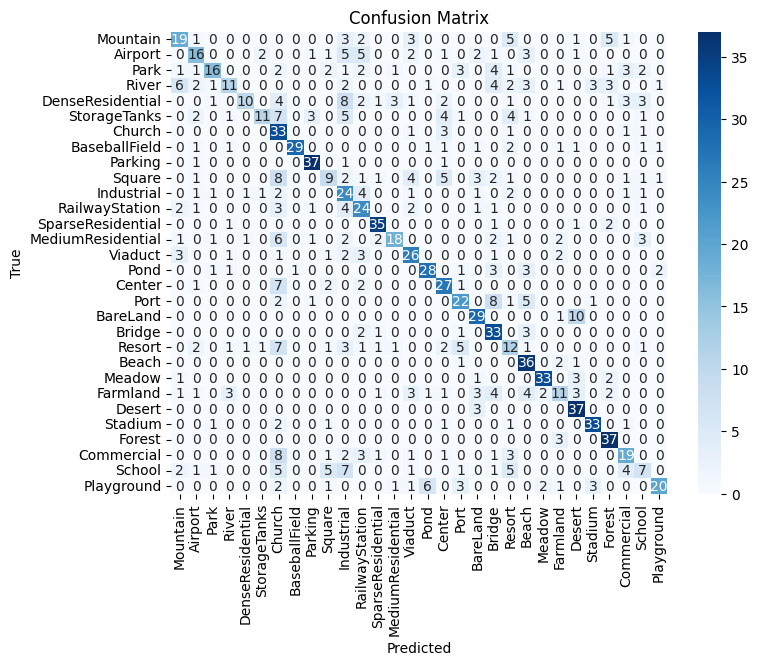

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report


# Assuming 'model' is your trained model, and 'X_test' and 'y_test' are your test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert labels to one-hot encoding
y_test_one_hot = to_categorical(y_test, num_classes=30)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes)
precision = precision_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes, average='weighted')
recall = recall_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes, average='weighted')
f1 = f1_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred_classes)
class_report = classification_report(np.argmax(y_test_one_hot, axis=1), y_pred_classes)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/kaggle/input/models-of-recognition-scene/multi_class_aid.h5')

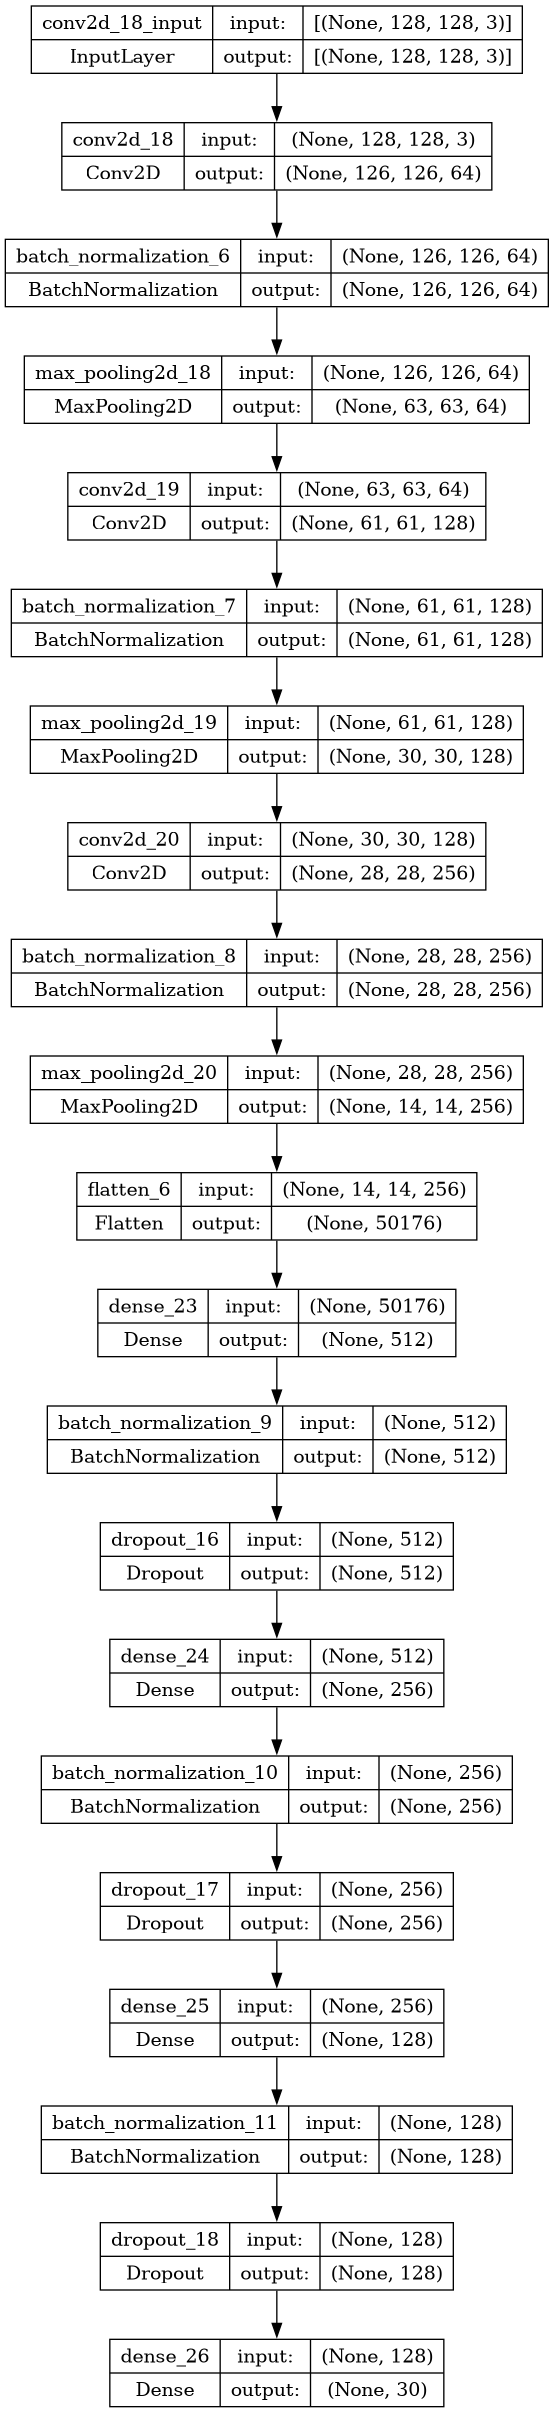

In [ ]:
from tensorflow.keras.utils import plot_model
# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

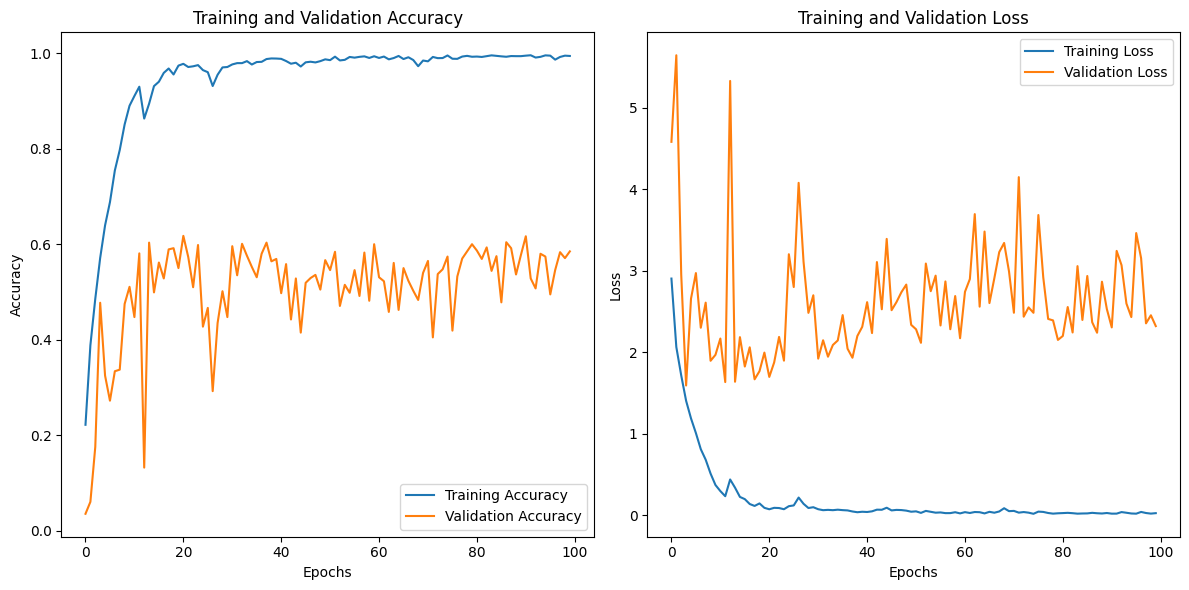

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('multi_class_aid.h5')

In [ ]:
from tensorflow.keras.models import Model

# Assuming you have defined your original CNN model as 'model'
original_model = model

# Choose an intermediate layer for feature extraction
intermediate_layer_name = 'dense_24'
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(intermediate_layer_name).output)

# Extract features
train_features = intermediate_layer_model.predict(X_train)
test_features = intermediate_layer_model.predict(X_test)


38/38 [==============================] - 0s 10ms/step


In [ ]:
train_features.shape


(4800, 256)

In [ ]:
test_features.shape

(1200, 256)

In [ ]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, y_train, test_size=0.2, random_state=42)

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Instantiate TPOTClassifier with reduced search space and fewer generations/population
tpot = TPOTClassifier(
    generations=3,
    population_size=10,
    config_dict='TPOT sparse',
    random_state=42,
    verbosity=2,
    n_jobs=-1
)

# Fit the TPOTClassifier on your training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the test set
accuracy = tpot.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Generation 3 - Current best internal CV score: 1.0

Best pipeline: MultinomialNB(CombineDFs(input_matrix, input_matrix), alpha=0.1, fit_prior=False)
Test Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report

# Get predictions on the test set
y_pred = tpot.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)

# Calculate recall for each class
recall = recall_score(y_test, y_pred, average=None)
print("\nRecall for Each Class:")
print(recall)

# Calculate F1-score for each class
f1 = f1_score(y_test, y_pred, average=None)
print("\nF1-Score for Each Class:")
print(f1)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 

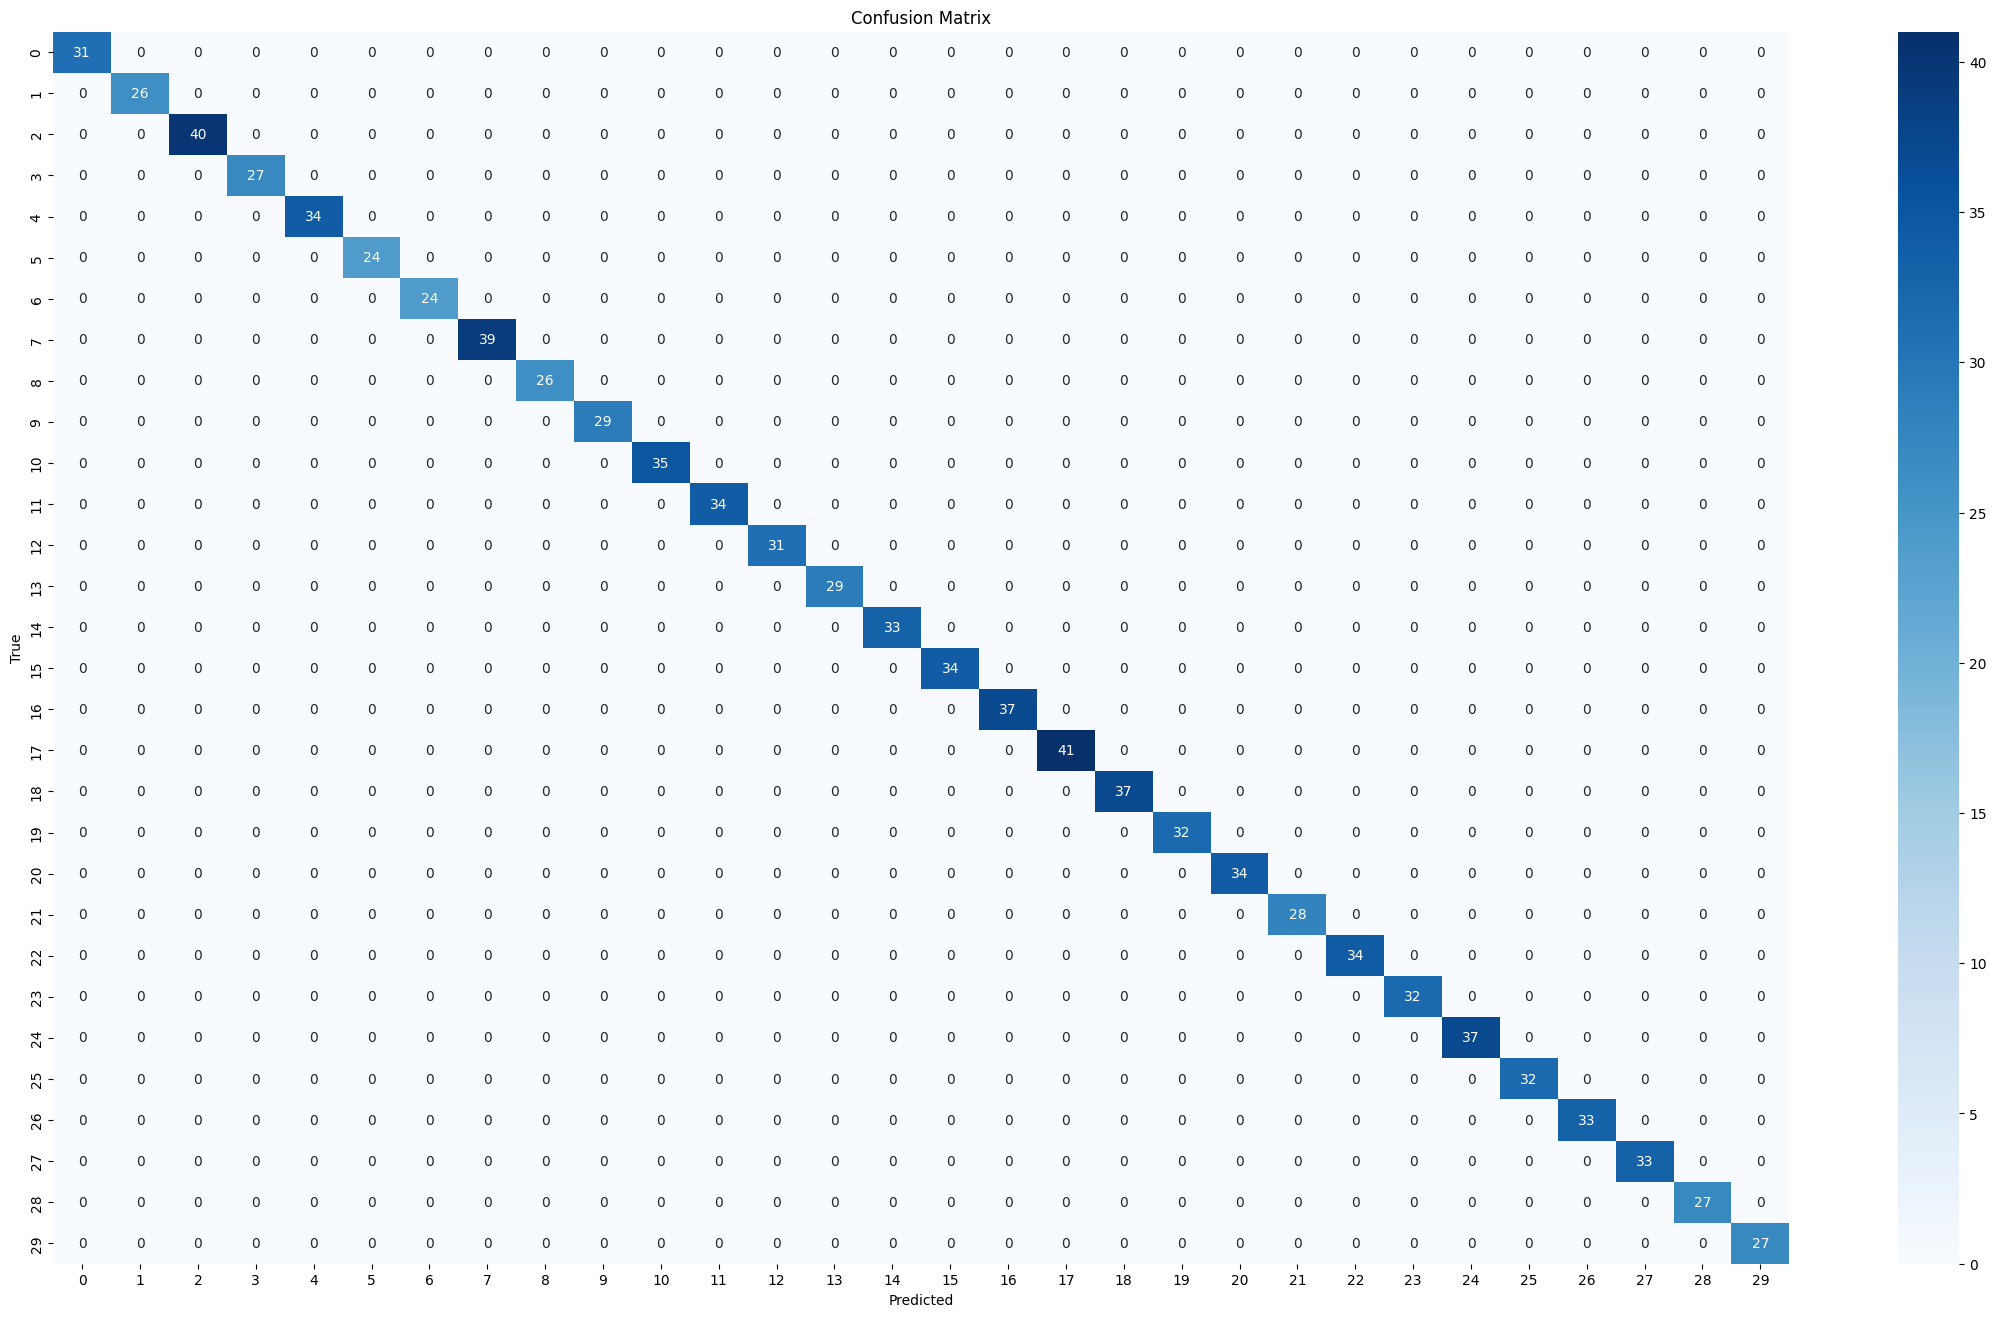

In [ ]:
import seaborn as sns
# Visualize confusion matrix
plt.figure(figsize=(28, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(cm)

[[31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0 

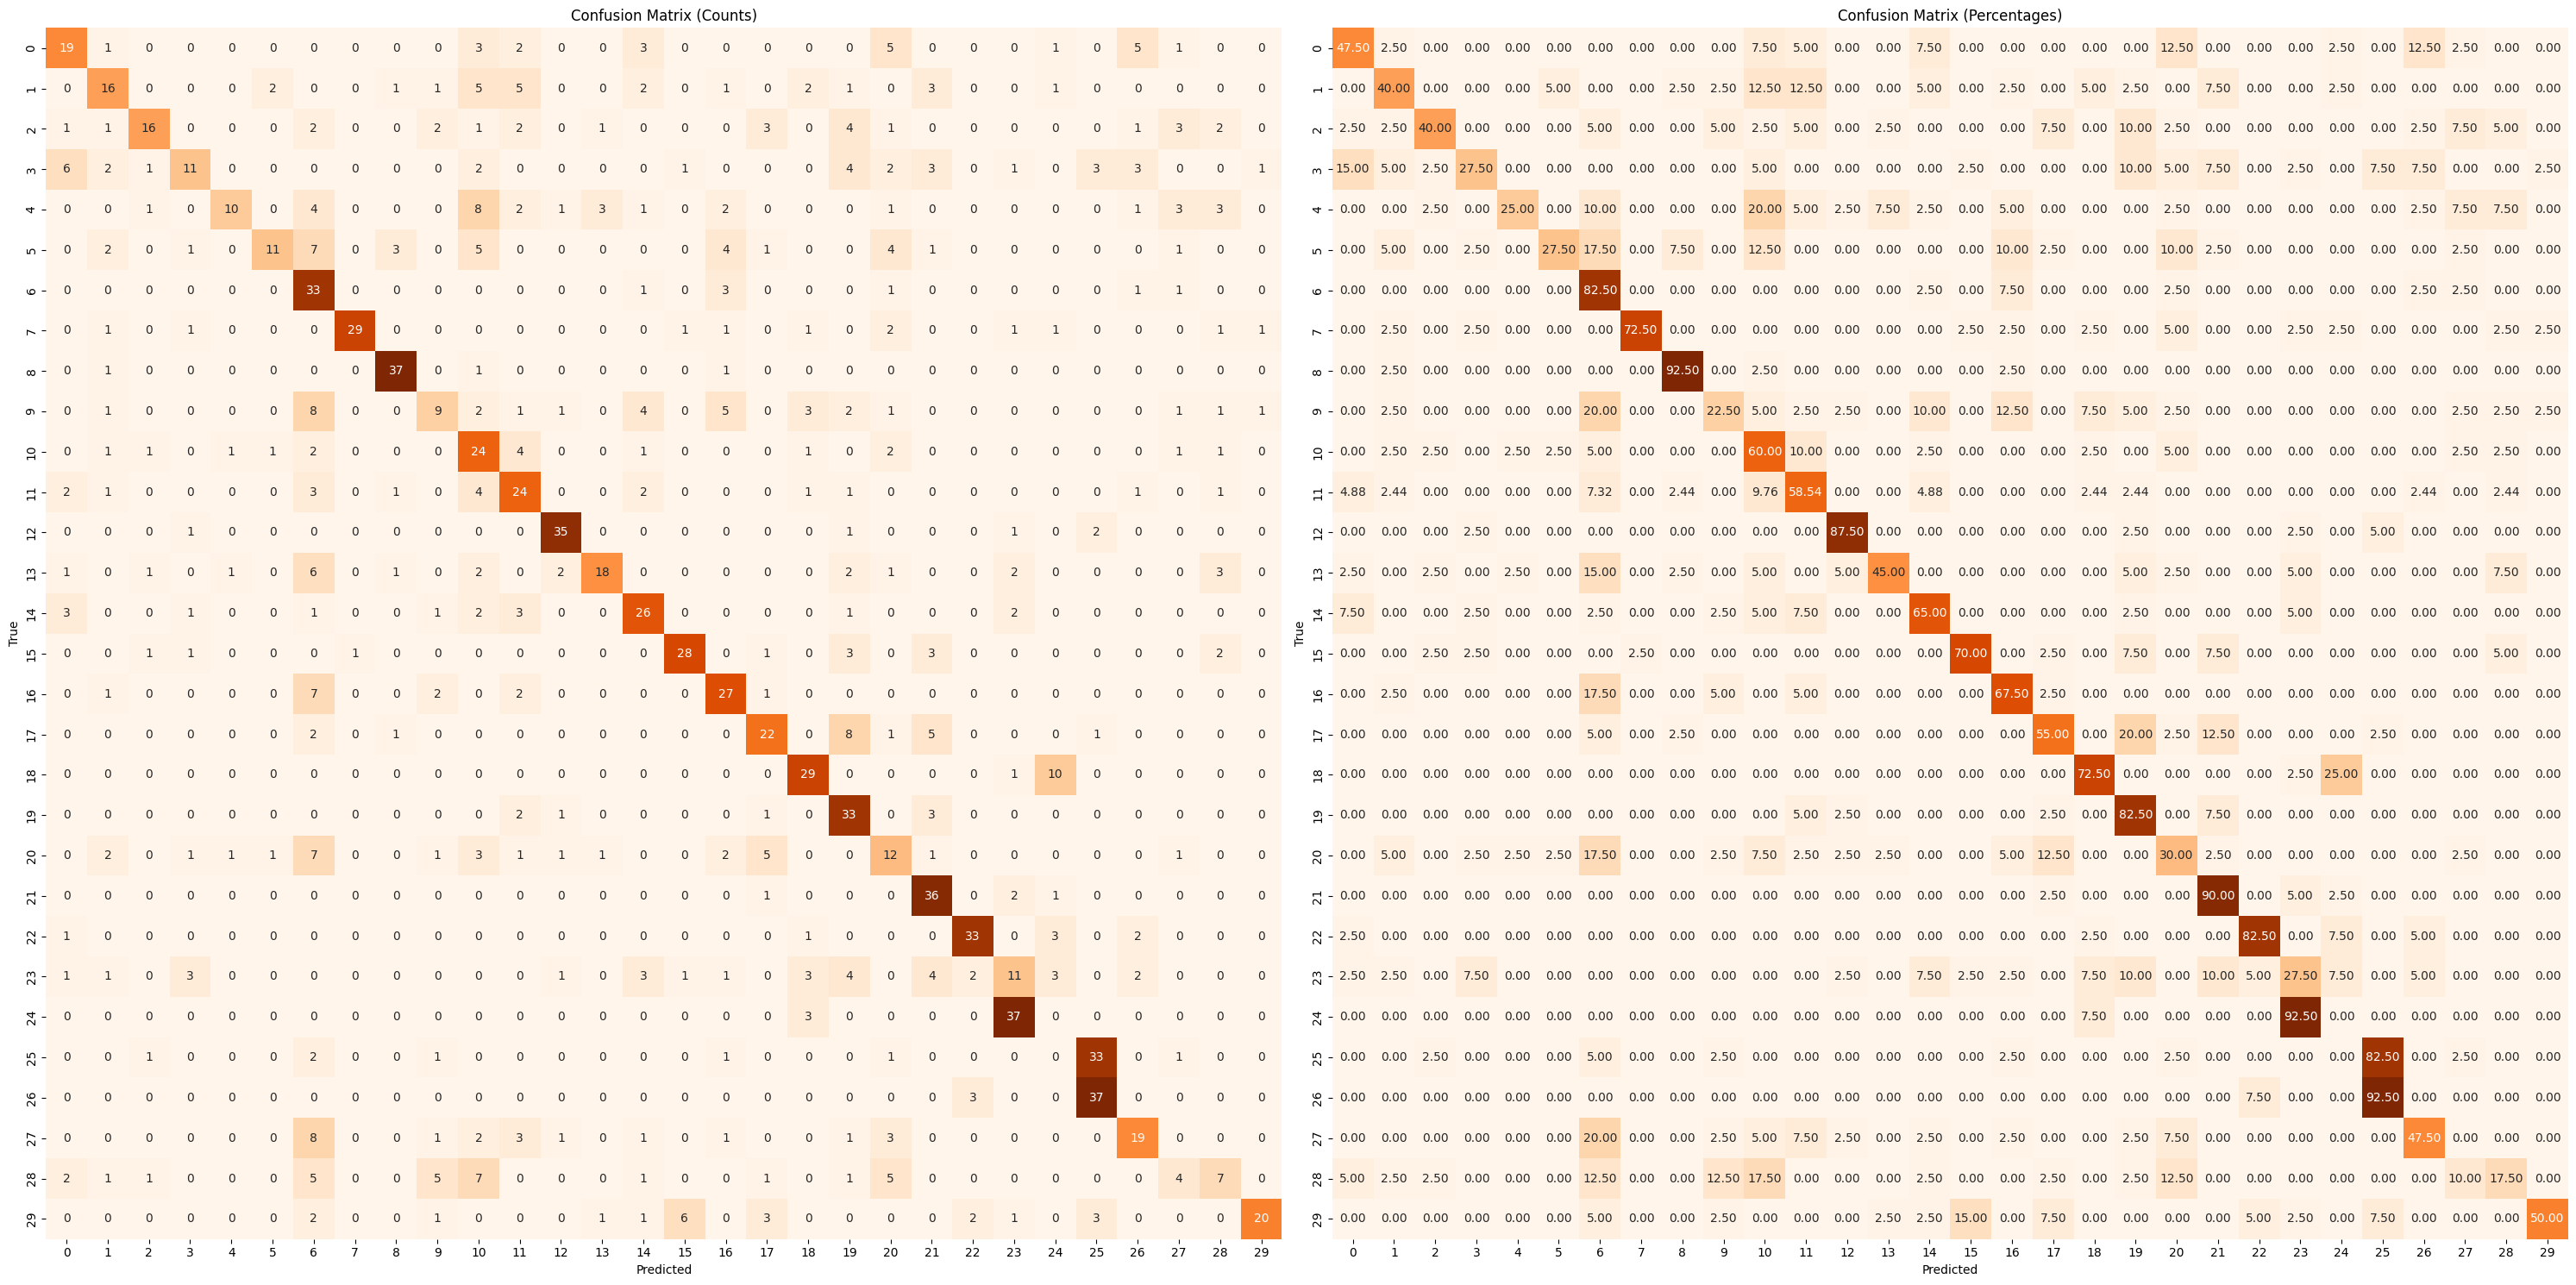

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix values
cm_values = np.array([[19, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 5, 1, 0, 0],
                     [0, 16, 0, 0, 0, 2, 0, 0, 1, 1, 5, 5, 0, 0, 2, 0, 1, 0, 2, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0],
                     [1, 1, 16, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 3, 0, 4, 1, 0, 0, 0, 0, 0, 1, 3, 2, 0],
                     [6, 2, 1, 11, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4, 2, 3, 0, 1, 0, 3, 3, 0, 0, 1],
                     [0, 0, 1, 0, 10, 0, 4, 0, 0, 0, 8, 2, 1, 3, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 3, 0],
                     [0, 2, 0, 1, 0, 11, 7, 0, 3, 0, 5, 0, 0, 0, 0, 0, 4, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                     [0, 1, 0, 1, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1],
                     [0, 1, 0, 0, 0, 0, 0, 0, 37, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0, 0, 8, 0, 0, 9, 2, 1, 1, 0, 4, 0, 5, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                     [0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 24, 4, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0],
                     [2, 1, 0, 0, 0, 0, 3, 0, 1, 0, 4, 24, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
                     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 35, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0],
                     [1, 0, 1, 0, 1, 0, 6, 0, 1, 0, 2, 0, 2, 18, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0],
                     [3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 3, 0, 0, 26, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 28, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0],
                     [0, 1, 0, 0, 0, 0, 7, 0, 0, 2, 0, 2, 0, 0, 0, 0, 27, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 8, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 1, 10, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 33, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 2, 0, 1, 1, 1, 7, 0, 0, 1, 3, 1, 1, 1, 0, 0, 2, 5, 0, 0, 12, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 36, 0, 2, 1, 0, 0, 0, 0, 0],
                     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 33, 0, 3, 0, 2, 0, 0, 0],
                     [1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 3, 4, 0, 4, 2, 11, 3, 0, 2, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 37, 0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 33, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 37, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 8, 0, 0, 1, 2, 3, 1, 0, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 19, 0, 0, 0],
                     [2, 1, 1, 0, 0, 0, 5, 0, 0, 5, 7, 0, 0, 0, 1, 0, 0, 1, 0, 1, 5, 0, 0, 0, 0, 0, 0, 4, 7, 0],
                     [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 6, 0, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 20]])

# Calculate the percentage confusion matrix
cm_percentage = cm_values.astype('float') / cm_values.sum(axis=1)[:, np.newaxis] * 100

# Visualize confusion matrix with counts
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
sns.heatmap(cm_values, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Counts)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Visualize percentage confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.tight_layout()
plt.show()


Text(220.72222222222223, 0.5, 'True')

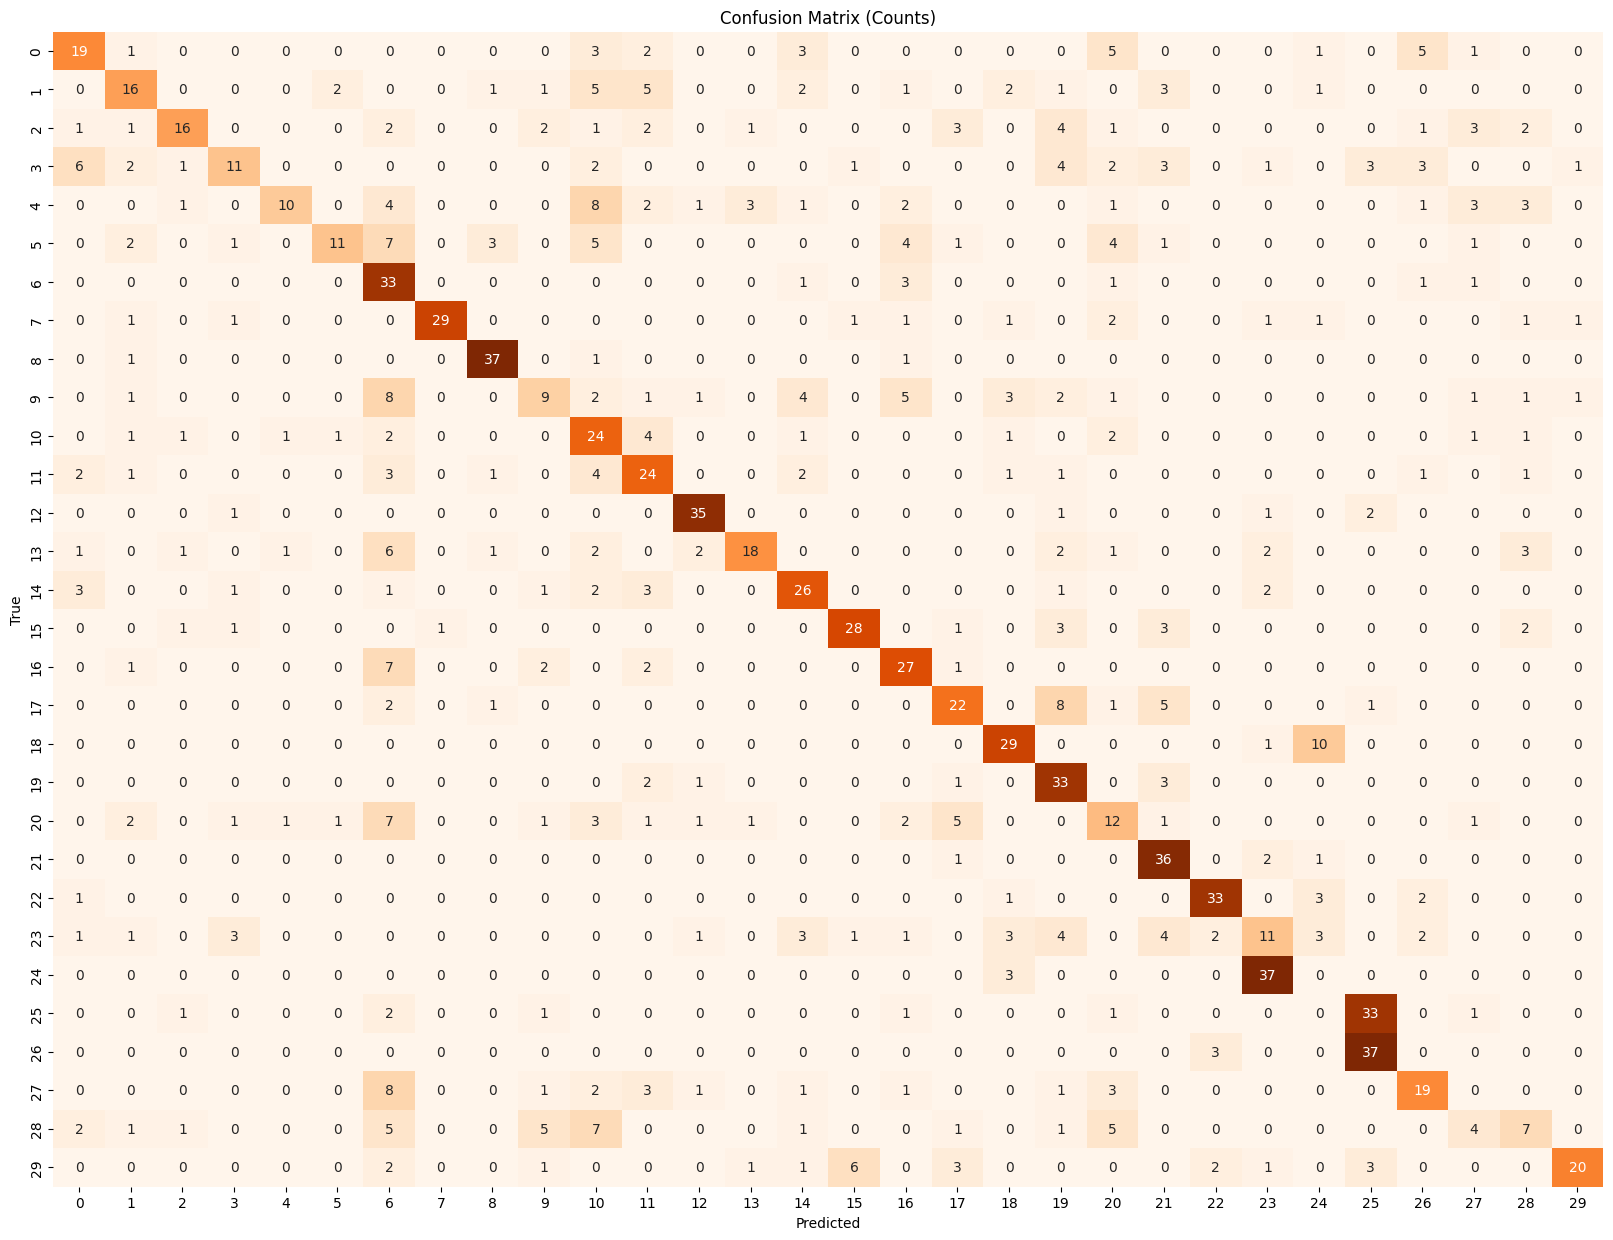

In [ ]:

# Visualize confusion matrix with counts
plt.figure(figsize=(20, 15))
sns.heatmap(cm_values, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Counts)')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(220.72222222222223, 0.5, 'True')

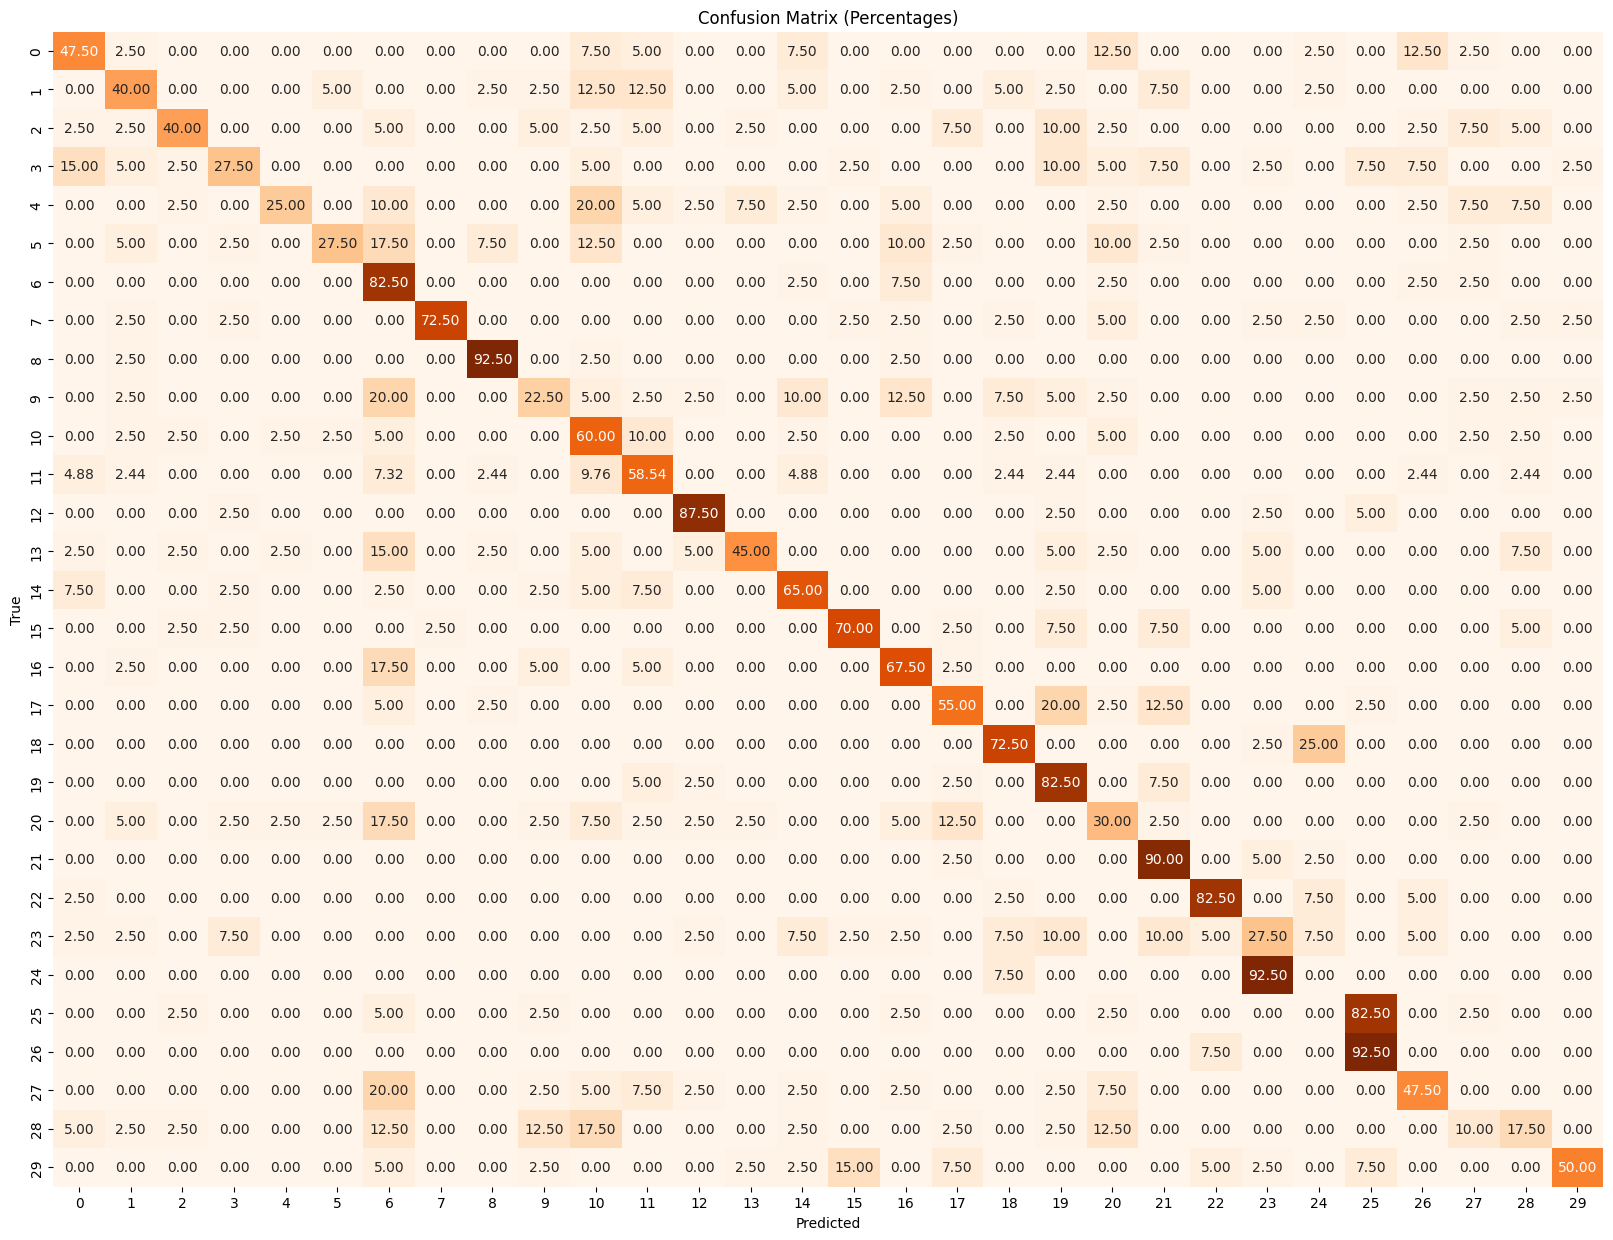

In [ ]:
# Visualize confusion matrix with counts
plt.figure(figsize=(20, 15))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('True')

# after

In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentage confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


Text(220.72222222222223, 0.5, 'True')

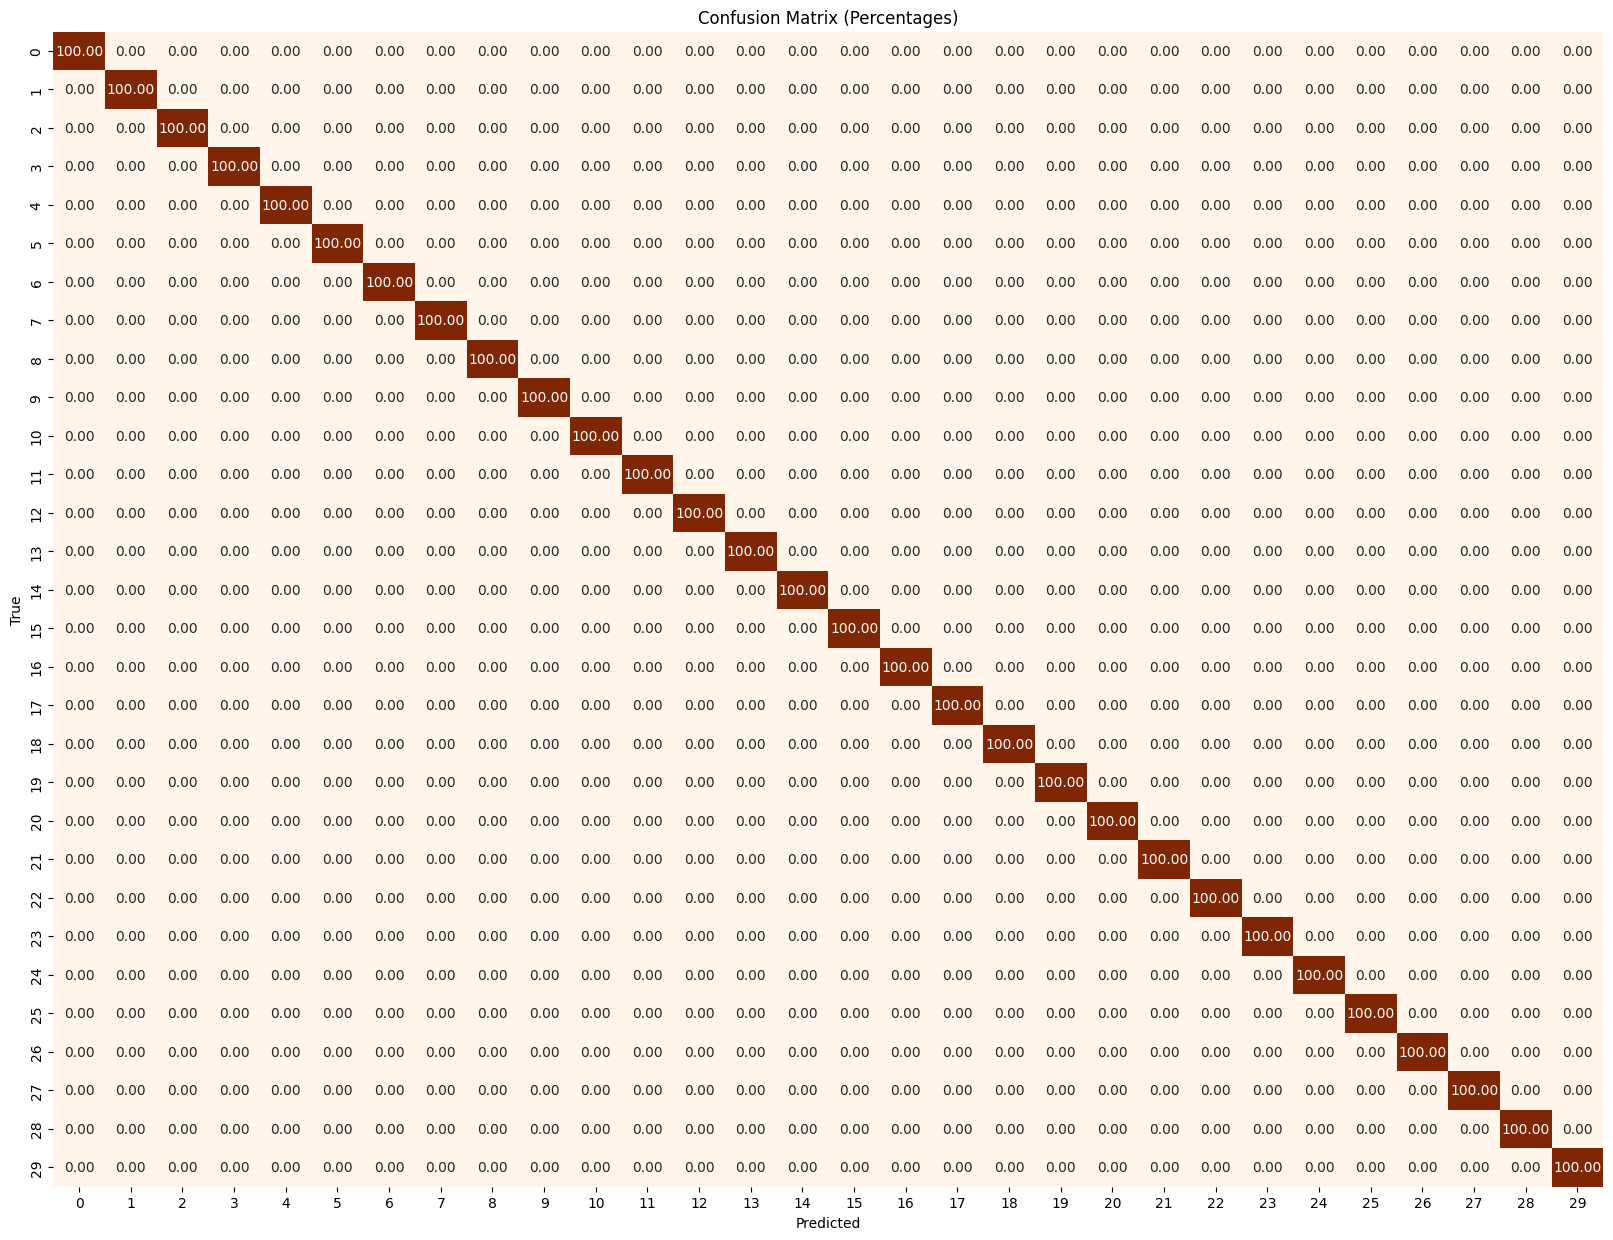

In [ ]:
# Visualize confusion matrix with counts
plt.figure(figsize=(20, 15))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(220.72222222222223, 0.5, 'True')

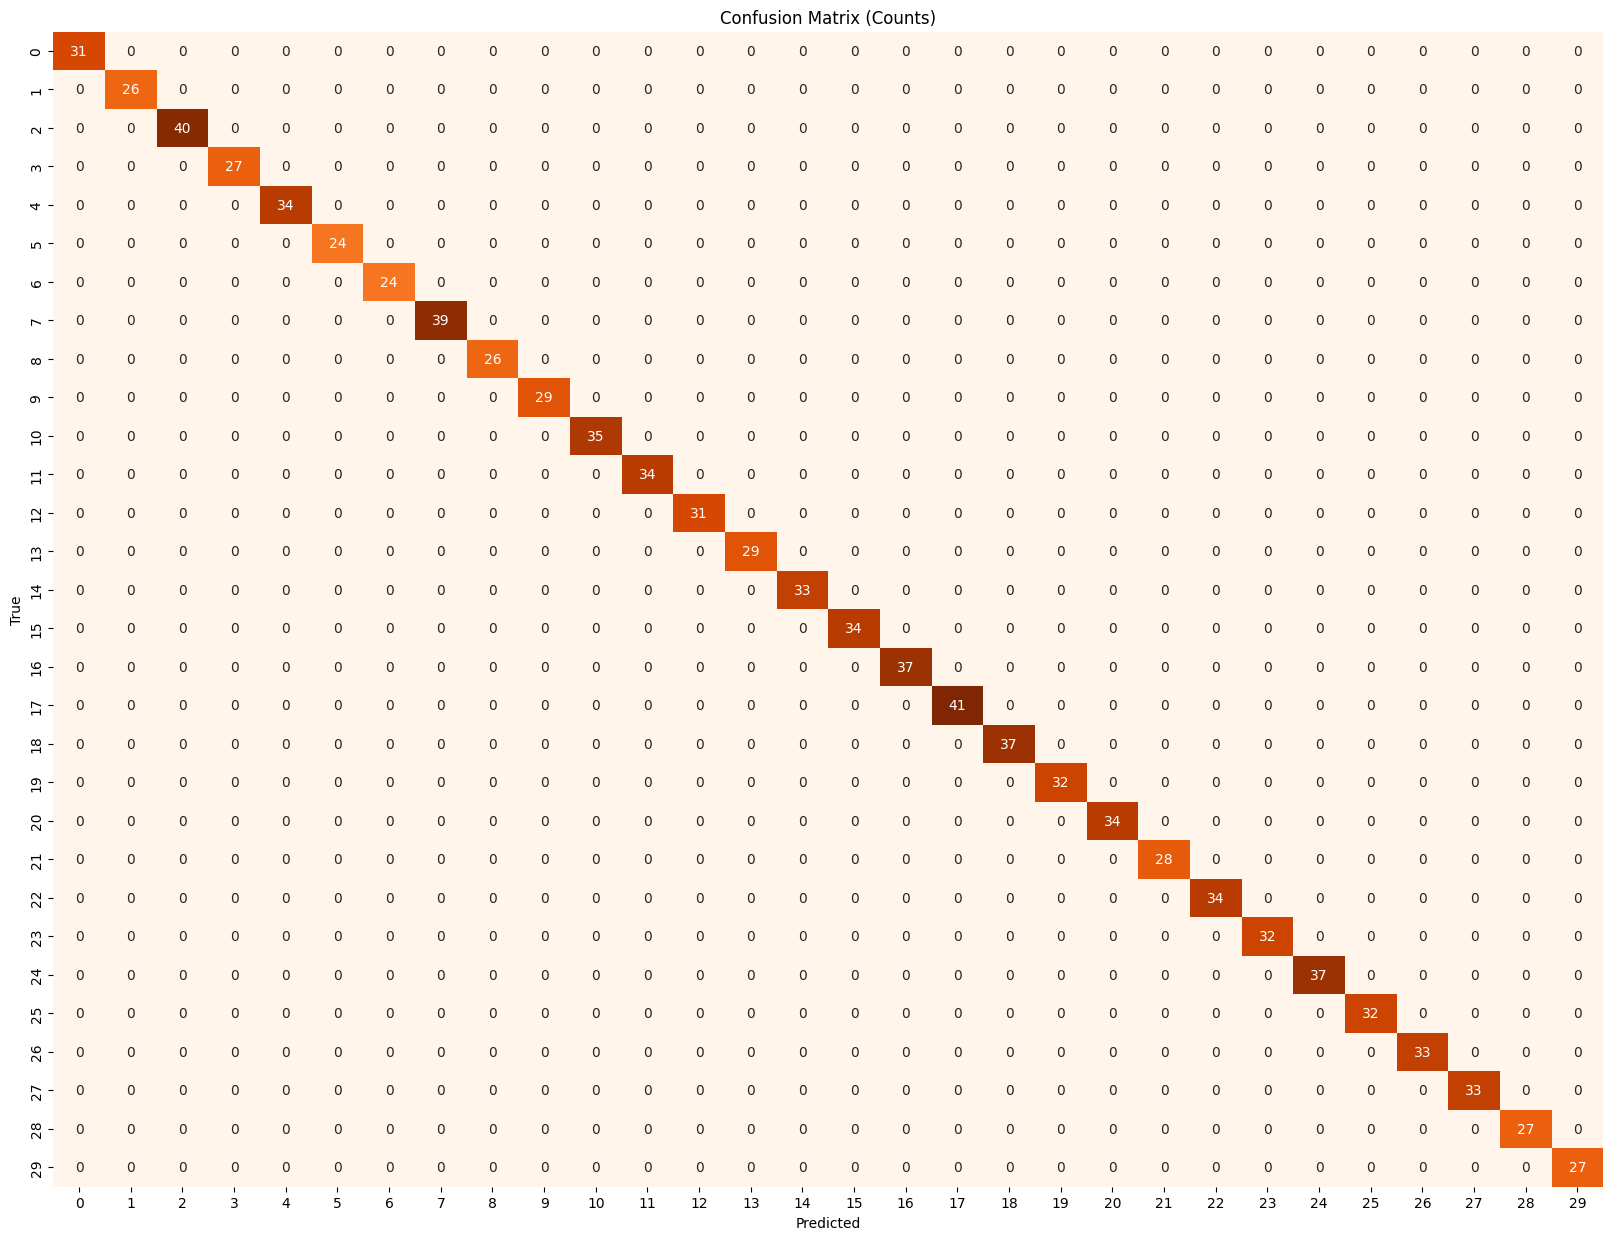

In [ ]:

# Visualize confusion matrix with counts
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Counts)')
plt.xlabel('Predicted')
plt.ylabel('True')

1/1 [==============================] - 0s 134ms/step


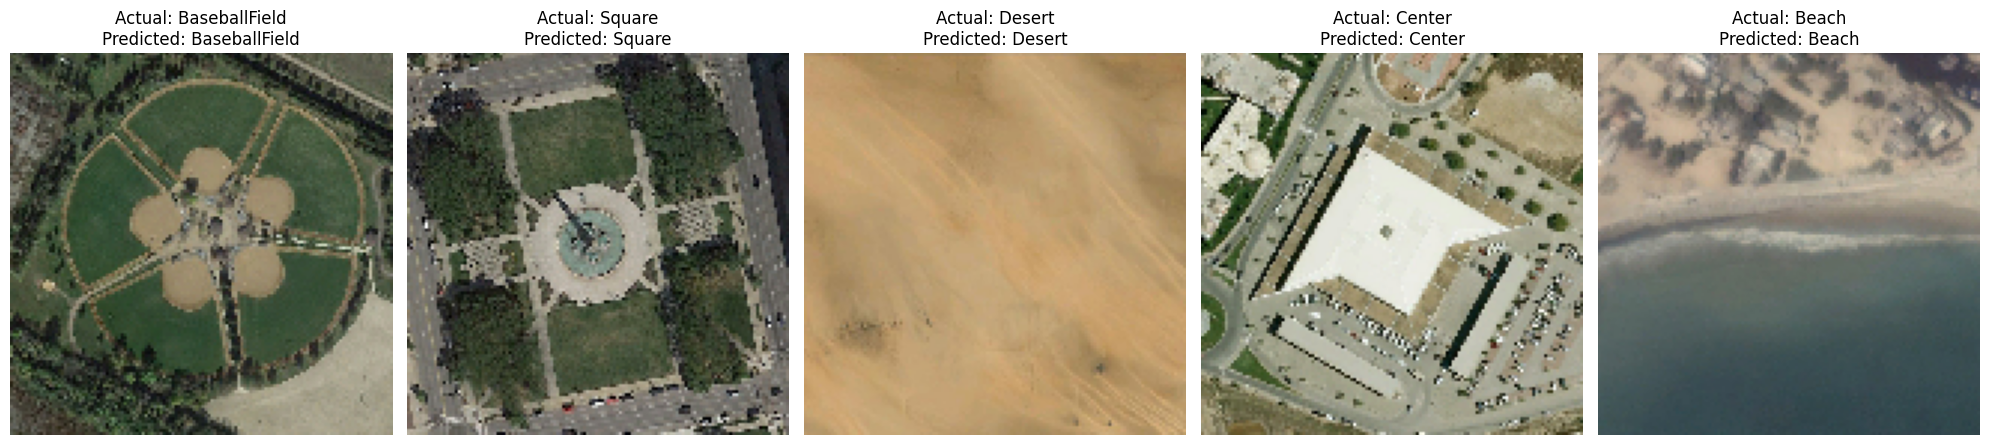

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = ['Mountain', 'Airport', 'Park', 'River', 'DenseResidential', 'StorageTanks', 'Church', 'BaseballField', 'Parking', 'Square', 'Industrial', 'RailwayStation', 'SparseResidential', 'MediumResidential', 'Viaduct', 'Pond', 'Center', 'Port', 'BareLand', 'Bridge', 'Resort', 'Beach', 'Meadow', 'Farmland', 'Desert', 'Stadium', 'Forest', 'Commercial', 'School', 'Playground']

def predict_class(image_path, actual_class, model_path='/kaggle/input/models-of-recognition-scene/multi_class_aid.h5'):
    # Load the pre-trained model
    model = original_model  # Replace with your actual model if it's different

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    intermediate_layer_name = 'dense_24'
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(intermediate_layer_name).output)
    features = intermediate_layer_model.predict(img_array)

    # Use the TPOTClassifier to predict the final class index
    predicted_index = tpot.predict(features)[0]

    # Get the class name from the class_labels list
    predicted_class = class_labels[predicted_index]

    return actual_class, predicted_class, img

def plot_image(ax, image_path, actual_class, predicted_class):
    # Load and plot the image
    img = image.load_img(image_path, target_size=(128, 128))
    ax.imshow(img)
    ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    ax.axis('off')

# Example usage
image_paths = [
    '/kaggle/input/aid-scene-classification-datasets/AID/BaseballField/baseballfield_1.jpg',
    '/kaggle/input/aid-scene-classification-datasets/AID/Square/square_101.jpg',
    '/kaggle/input/aid-scene-classification-datasets/AID/Desert/desert_108.jpg',
    '/kaggle/input/aid-scene-classification-datasets/AID/Center/center_1.jpg',
    '/kaggle/input/aid-scene-classification-datasets/AID/Beach/beach_10.jpg'
]

actual_classes = ['BaseballField', 'Square', 'Desert', 'Center', 'Beach']

# Create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,10))

for i in range(len(image_paths)):
    ax = axs[i]
    image_path = image_paths[i]
    actual_class = actual_classes[i]
    actual_class, predicted_class, img = predict_class(image_path, actual_class)
    plot_image(ax, image_path, actual_class, predicted_class)

plt.tight_layout()
plt.savefig('aid_test.png')  # Save the figure
plt.show()
